# Módulo de conversión de coordenadas para monturas altazimutales

Este es un módulo basado en [Astropy](http://www.astropy.org/) que permite crear un objeto para una montura localizada en un punto sobre la Tierra el cual contiene métodos (funciones adaptadas a las caracteristicas del objeto) que retornan un array de coordenadas horizontales a partir de coorenadas ecuatoriales. También incluye métodos de seguimiento solar.

El módulo no contiene rutinas de control de motores. Las funciones de conversión permiten crear referencias de control que pueden ser enviadas a un controlador.

### Creación de objeto de montura



In [18]:
import tracker as tr

#Object creation
Montura = tr.ElAzMount()

#Set location (Puebla)
Montura.setLocation(Lat='19d02m36s',Lon='-98d21m6.94s',Height = 2135)

### Atributos de montura

In [10]:
#Get latitude (astropy units type)
Montura.Lat

<Latitude 19.04333333 deg>

In [11]:
#Get longitude (astropy units type)
Montura.Lon

<Longitude -98.35192778 deg>

In [19]:
#Get height (astropy units type)
Montura.Height

<Quantity 2135. m>

In [13]:
#Print mount object
print(Montura)

Mount location:
 Lat: 19.043333333333337 deg,
 Lon: -98.35192777777777 deg,
 Height: 2.134999998566077 m


### Conversión de coordenadas 

In [14]:
#Current Capella position
[El,Az] = Montura.eq2hor(DEC='45d59m56s',RA='05h16m41')
print("Capella -- El: {}, Az: {}".format(El,Az))

Capella -- El: 40.64396670907645, Az: 314.98033942507635


### Seguimiento solar

In [15]:
#Current Sun position
[Sun_El,Sun_Az] = Montura.SolarTracking()
print("Sun -- El: {}, Az: {}".format(Sun_El,Sun_Az))

Sun -- El: 58.30994558596945, Az: 283.72146357456893


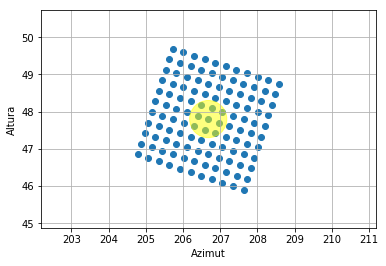

In [17]:
from datetime import datetime
import matplotlib.pyplot as plt

#Sweep matrix
sweep_center_date = datetime(2017,1,24,14,0,0)  
[a,az] = Montura.Sun_Pos_by_date(sweep_center_date)
m_az,m_el = Montura.sweep_matrix(sweep_center_date,11,11,0.3,0.3) 

fig = plt.figure()
ax = fig.add_subplot(111)
C = plt.Circle((az,a),radius=0.5,color='yellow',alpha=0.5)
ax.add_patch(C)
ax.scatter(az+m_az,a+m_el)
ax.axis('equal')
ax.set(xlim=(az-4.5,az+4.5), ylim=(a-4.5,a+4.5),)
plt.grid(True)
plt.xlabel('Azimut')
plt.ylabel('Altura')
plt.show()